* Trying to predict how long it will take to resolve a train malfunction with Regression strategy.

# 1. Load libraries and data

### 1.1. Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

# MODELS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### 1.2. Load data

In [3]:
data_import = pd.read_csv('W9 - ProjectData_3-num_duration.csv')
data_import.head()

,station_name,latitude,longitude,month,day_of_week,holiday,time_type,malfunction_cause,malfunction_cause_group,rain_bins,wind_bins,temp_bins,duration_minutes
0,Almere Oostvaarders,52.403332,5.300556,January,Tuesday,holiday,peak,vandalism,external,medium,medium,chilly,162
1,Lelystad Centrum,52.507778,5.472778,January,Tuesday,holiday,peak,vandalism,external,medium,medium,chilly,162
2,Ermelo,52.301666,5.614722,January,Tuesday,holiday,peak,signal failure,infrastructure,medium,medium,chilly,17
3,Harderwijk,52.337502,5.619722,January,Tuesday,holiday,peak,signal failure,infrastructure,medium,medium,chilly,17
4,Putten,52.264999,5.575278,January,Tuesday,holiday,peak,signal failure,infrastructure,medium,medium,chilly,17


# 2. EDA

### 2.1. Data exploration

In [4]:
print("DATA SHAPE IS: ", data_import.shape)
print("")
print ("DATA DTYPES ARE: ") 
data_import.dtypes

DATA SHAPE IS:  (19041, 13)

DATA DTYPES ARE: 


station_name                object
latitude                   float64
longitude                  float64
month                       object
day_of_week                 object
holiday                     object
time_type                   object
malfunction_cause           object
malfunction_cause_group     object
rain_bins                   object
wind_bins                   object
temp_bins                   object
duration_minutes             int64
dtype: object

### 2.2. Checking for null values 
* there shouldn't be any, since this dataset was saved after cleaning.\

### 2.3. Dropping columns

In [6]:
data_import.columns

Index(['station_name', 'latitude', 'longitude', 'month', 'day_of_week',
       'holiday', 'time_type', 'malfunction_cause', 'malfunction_cause_group',
       'rain_bins', 'wind_bins', 'temp_bins', 'duration_minutes'],
      dtype='object')

In [8]:
data = data_import.drop(['latitude','longitude','malfunction_cause_group'], axis = 1)

In [9]:
data.head()

,station_name,month,day_of_week,holiday,time_type,malfunction_cause,rain_bins,wind_bins,temp_bins,duration_minutes
0,Almere Oostvaarders,January,Tuesday,holiday,peak,vandalism,medium,medium,chilly,162
1,Lelystad Centrum,January,Tuesday,holiday,peak,vandalism,medium,medium,chilly,162
2,Ermelo,January,Tuesday,holiday,peak,signal failure,medium,medium,chilly,17
3,Harderwijk,January,Tuesday,holiday,peak,signal failure,medium,medium,chilly,17
4,Putten,January,Tuesday,holiday,peak,signal failure,medium,medium,chilly,17


### 2.4. Categorical Columns - Get Dummies

In [10]:
data2 = data.drop(['duration_minutes'], axis=1)

In [11]:
dummy_data = pd.get_dummies(data2,drop_first=True)
dummy_data.head()

,station_name_'s-Hertogenbosch Oost,station_name_'t Harde,station_name_Aalten,station_name_Abcoude,station_name_Akkrum,station_name_Alkmaar,station_name_Alkmaar Noord,station_name_Almelo,station_name_Almelo de Riet,station_name_Almere Buiten,station_name_Almere Centrum,station_name_Almere Muziekwijk,station_name_Almere Oostvaarders,station_name_Almere Parkwijk,station_name_Almere Poort,station_name_Alphen a/d Rijn,station_name_Amersfoort Centraal,station_name_Amersfoort Schothorst,station_name_Amersfoort Vathorst,station_name_Amsterdam Amstel,station_name_Amsterdam Bijlmer ArenA,station_name_Amsterdam Centraal,station_name_Amsterdam Holendrecht,station_name_Amsterdam Lelylaan,station_name_Amsterdam Muiderpoort,station_name_Amsterdam RAI,station_name_Amsterdam Science Park,station_name_Amsterdam Sloterdijk,station_name_Amsterdam Zuid,station_name_Anna Paulowna,station_name_Antwerpen-Berchem,station_name_Antwerpen-Centraal,station_name_Antwerpen-Luchtbal,station_name_Antwerpen-Noorderdokken,station_name_Apeldoorn,station_name_Apeldoorn De Maten,station_name_Apeldoorn Osseveld,station_name_Appingedam,station_name_Arkel,station_name_Arnemuiden,station_name_Arnhem Centraal,station_name_Arnhem Presikhaaf,station_name_Arnhem Velperpoort,station_name_Arnhem Zuid,station_name_Assen,station_name_Baarn,station_name_Bad Bentheim,station_name_Bad Nieuweschans,station_name_Baflo,station_name_Barendrecht,station_name_Barneveld Centrum,station_name_Barneveld Noord,station_name_Barneveld Zuid,station_name_Bedum,station_name_Beek-Elsloo,station_name_Beesd,station_name_Beilen,station_name_Bergen op Zoom,station_name_Best,station_name_Beverwijk,station_name_Bielefeld Hbf,station_name_Bilthoven,station_name_Blerick,station_name_Bloemendaal,station_name_Bodegraven,station_name_Boisheim,station_name_Borne,station_name_Boskoop,station_name_Boskoop Snijdelwijk,station_name_Boven-Hardinxveld,station_name_Bovenkarspel Flora,station_name_Bovenkarspel-Grootebroek,station_name_Boxmeer,station_name_Boxtel,station_name_Breda,station_name_Breda-Prinsenbeek,station_name_Bressoux,station_name_Breukelen,station_name_Breyell,station_name_Brummen,station_name_Brussel-Centraal,station_name_Brussel-Noord,station_name_Brussel-Zuid/Midi,station_name_Brussels Airport-Zaventem,station_name_Buitenpost,station_name_Bunde,station_name_Bunnik,station_name_Bussum Zuid,station_name_Bünde (Westf),station_name_Capelle Schollevaar,station_name_Castricum,station_name_Chevremont,station_name_Coevorden,station_name_Cuijk,station_name_Culemborg,station_name_Daarlerveen,station_name_Dalen,station_name_Dalfsen,station_name_De Vink,station_name_De Westereen,station_name_Deinum,station_name_Delden,station_name_Delft,station_name_Delft Campus,station_name_Delfzijl,station_name_Delfzijl West,station_name_Den Dolder,station_name_Den Haag Centraal,station_name_Den Haag HS,station_name_Den Haag Laan v NOI,station_name_Den Haag Mariahoeve,station_name_Den Haag Moerwijk,station_name_Den Haag Ypenburg,station_name_Den Helder,station_name_Den Helder Zuid,station_name_Deurne,station_name_Deventer,station_name_Deventer Colmschate,station_name_Didam,station_name_Diemen,station_name_Diemen Zuid,station_name_Dieren,station_name_Doetinchem,station_name_Doetinchem De Huet,station_name_Dordrecht,station_name_Dordrecht Stadspolders,station_name_Dordrecht Zuid,station_name_Driebergen-Zeist,station_name_Driehuis,station_name_Dronryp,station_name_Dronten,station_name_Duisburg Hbf,station_name_Duiven,station_name_Duivendrecht,station_name_Dülken,station_name_Düsseldorf Flughafen,station_name_Düsseldorf Hbf,station_name_Echt,station_name_Ede Centrum,station_name_Ede-Wageningen,station_name_Eemshaven,station_name_Eijsden,station_name_Eindhoven Centraal,station_name_Eindhoven Strijp-S,station_name_Ekeren,station_name_Elst,station_name_Emmen,station_name_Emmen Zuid,station_name_Emmerich,station_name_Enkhuizen,station_name_Enschede,station_name_Enschede De Eschmarke,station_name_Enschede Kennispark,station_name_E

### 2.5. Divide data into dependent and independent variables

In [12]:
y = data[['duration_minutes']]
X = dummy_data

In [13]:
y.shape

(19041, 1)

In [14]:
X.shape

(19041, 529)

# 3. Model

### 3.1. Train-Test split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### 3.2. Model 1 - Linear Regression

In [18]:
lm = linear_model.LinearRegression()
lm_model = lm.fit(X_train, y_train)

In [19]:
lm_predictions = lm_model.predict(X_test)

In [20]:
MAE = mean_absolute_error(y_test,lm_predictions)
MSE = mean_squared_error(y_test,lm_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,lm_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:  43.59
The mean squared error of the model in the test set is: 3258.67
The root mean squared error of the model in the test set is:  57.08
The R2 of the model in the test set is: 0.27


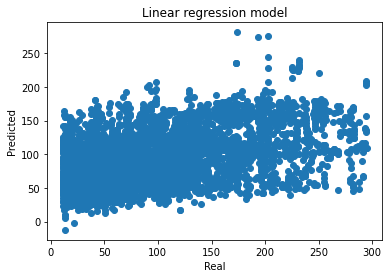

In [21]:
plt.scatter(x=y_test, y=lm_predictions)

plt.title('Linear regression model')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

### 3.3. Model 2 - KNN
* These are the best results.

In [22]:
kn = KNeighborsRegressor(n_neighbors=2)
kn_model = kn.fit(X_train, y_train)

In [23]:
kn_predictions = kn_model.predict(X_test)

In [24]:
MAE = mean_absolute_error(y_test,kn_predictions)
MSE = mean_squared_error(y_test,kn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,kn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:  27.01
The mean squared error of the model in the test set is: 2156.87
The root mean squared error of the model in the test set is:  46.44
The R2 of the model in the test set is: 0.52


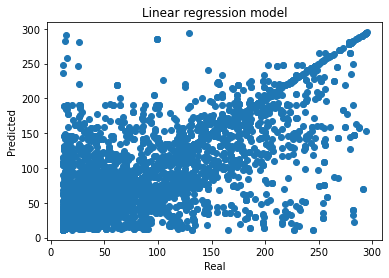

In [35]:
plt.scatter(x=y_test, y=kn_predictions)

plt.title('Linear regression model')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.savefig('errors_knn.png', dpi=300, bbox_inches='tight')
plt.show()

### 3.4. Model 3 - Decision Tree Regressor

In [26]:
dtr = DecisionTreeRegressor()
dtr_model = dtr.fit(X_train, y_train)

In [27]:
dtr_predictions = dtr_model.predict(X_test)

In [28]:
MAE = mean_absolute_error(y_test,dtr_predictions)
MSE = mean_squared_error(y_test,dtr_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,dtr_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:  26.44
The mean squared error of the model in the test set is: 2762.61
The root mean squared error of the model in the test set is:  52.56
The R2 of the model in the test set is: 0.38


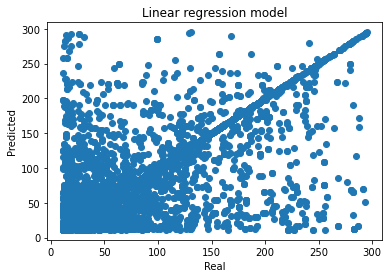

In [29]:
plt.scatter(x=y_test, y=dtr_predictions)

plt.title('Linear regression model')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

### 3.5. Model 4 - Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from scipy.special import boxcox, inv_boxcox

In [31]:
regr = RandomForestRegressor()
regr_model = regr.fit(X_train, y_train)

<ipython-input-31-7b68cd4b3283>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr_model = regr.fit(X_train, y_train)


In [32]:
regr_predictions = regr_model.predict(X_test)

In [33]:
MAE = mean_absolute_error(y_test,regr_predictions)
MSE = mean_squared_error(y_test,regr_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,regr_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:  27.86
The mean squared error of the model in the test set is: 2147.16
The root mean squared error of the model in the test set is:  46.34
The R2 of the model in the test set is: 0.52


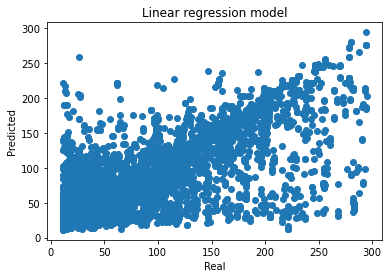

In [34]:
plt.scatter(x=y_test, y=regr_predictions)

plt.title('Linear regression model')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

### 3.6. Model 5 - XGBooster

In [36]:
import xgboost as xgb

In [37]:
y_xgb = y
X_xgb = X

In [38]:
data_dmatrix = xgb.DMatrix(data=X_xgb,label=y_xgb)

In [39]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.3, random_state=100)

In [40]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [41]:
xg_model = xg_reg.fit(X_train_xgb,y_train_xgb)

preds = xg_model.predict(X_test_xgb)

[14:34:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[14:34:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [42]:
MAE = mean_absolute_error(y_test_xgb,preds)
MSE = mean_squared_error(y_test_xgb,preds)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test_xgb,preds)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:  47.41
The mean squared error of the model in the test set is: 4508.17
The root mean squared error of the model in the test set is:  67.14
The R2 of the model in the test set is: -0.00


In [44]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[14:35:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[14:35:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[14:35:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [45]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,101.214950,0.287537,101.226565,0.634917
1,94.904300,0.366403,94.961133,0.800729
2,89.623850,0.298796,89.709567,1.045467
3,84.711446,0.205731,84.833590,0.919984
4,80.647903,0.346100,80.800964,0.680183


In [46]:
print((cv_results["test-rmse-mean"]).tail(1))

49    54.748924
Name: test-rmse-mean, dtype: float64
